# Phase 3 Project

![Telecomm Industry](./images/cessna_vs_piper.jpg)

## 1. Business Problem
[place holder for stakeholders & background info]

The business problem at hand is to predict customer churn for SyriaTel, a telecommunications company, in order to minimize revenue loss and enhance customer retention efforts. With customer attrition posing a significant challenge to profitability in the telecom industry, SyriaTel seeks to identify patterns and trends within its customer base that indicate potential churn. By leveraging historical data and predictive modeling techniques, the aim is to develop a classifier that can accurately forecast which customers are likely to discontinue their services, enabling SyriaTel to implement targeted retention strategies and ultimately strengthen its competitive position in the market.


The goal: Create a model to predict churn in telecom members contacting support. We are aiming to reduce the amount of cases in which members are mistakenly identified as retained (false negative) vs mistakenly identified as churned to ensure we capture all members who may churn (positive).

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

## 2. Data Understanding

For this analysis, the SyriaTel churn data was sourced from [Kaggle](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset).

The dataset contains data on the customers of a Telecom company. Each row represents a customer and the columns contain customer’s attributes which are described in the following:

- state: the state the user lives in
- account length: the number of days the user has this account
- area code: the code of the area the user lives in
- phone number: the phone number of the user
- international plan: true if the user has the international plan, otherwise false
- voice mail plan: true if the user has the voice mail plan, otherwise false
- number vmail messages: the number of voice mail messages the user has sent
- total day minutes: total number of minutes the user has been in calls during the day
- total day calls: total number of calls the user has done during the day
- total day charge: total amount of money the user was charged by the Telecom company for calls during the day
- total eve minutes: total number of minutes the user has been in calls during the evening
- total eve calls: total number of calls the user has done during the evening
- total eve charge: total amount of money the user was charged by the Telecom company for calls during the evening
- total night minutes: total number of minutes the user has been in calls during the night
- total night calls: total number of calls the user has done during the night
- total night charge: total amount of money the user was charged by the Telecom company for calls during the night
- total intl minutes: total number of minutes the user has been in international calls
- total intl calls: total number of international calls the user has done
- total intl charge: total amount of money the user was charged by the Telecom company for international calls
- customer service calls: number of customer service calls the user has done
- churn: true if the user terminated the contract, otherwise false

In [2]:
# load the dataset
df = pd.read_csv('data/churn_dataset.csv')
df.head()

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

The dataset has no missingness and most columns are numeric. Will have to explore the object type columns to assess whether to drop or transform. With 3333 entries, the dataset is not small but not the largest, depending on the distribution of the target, may need to consider re-sampling.

Before getting into the data exploration, we will rename the columns with _ instead of spaces. We can also drop phone number right off the bat from the dataset as this is not something we can use to determine churn. It is a un

In [4]:
# Rename columns with '_' instead of spaces
df.columns = df.columns.str.replace(' ','_')

# Drop the phone number column.
# df.drop('phone_number', axis=1, inplace=True)
df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')

## 3. Data Exploration

### Target Variable: Churn
- Of the 3,333 customers in this dataset, 483 terminated their contract with SyriaTel.
- This is an imbalanced dataset, with 14.5% of customers lost. We will need to address this before modeling in our preprocessing.
- we will also label encode this variable to change it from a bool to a numeric value.

False    2850
True      483
Name: churn, dtype: int64

False    0.855086
True     0.144914
Name: churn, dtype: float64


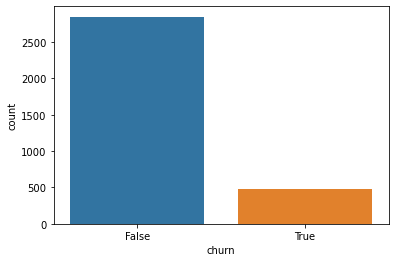

In [5]:
# Churn
print(df.churn.value_counts())
print()
print(df.churn.value_counts(normalize=True))
sns.countplot(data=df, x='churn', );

In [6]:
#Perfoming label encoding
#False becomes 0 and True becomes 1
encoder = LabelEncoder()
df['churn'] = encoder.fit_transform(df['churn'])
df['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

### Categorical Columns

In [7]:
df.select_dtypes('object')

state phone_number international_plan voice_mail_plan
0       KS     382-4657                 no             yes
1       OH     371-7191                 no             yes
2       NJ     358-1921                 no              no
3       OH     375-9999                yes              no
4       OK     330-6626                yes              no
...    ...          ...                ...             ...
3328    AZ     414-4276                 no             yes
3329    WV     370-3271                 no              no
3330    RI     328-8230                 no              no
3331    CT     364-6381                yes              no
3332    TN     400-4344                 no             yes

[3333 rows x 4 columns]

#### `phone_number`

We can drop phone number right off the bat from the dataset as this is not something we can use to determine churn. There are no duplicate entries, thus every row is unqiue and this variable is similar to an index.

In [8]:
print(df['phone_number'].value_counts())
df.drop('phone_number', axis=1, inplace=True)

401-2468    1
374-4664    1
350-4297    1
383-3375    1
366-4467    1
           ..
352-9050    1
411-8549    1
333-3460    1
328-7252    1
414-6426    1
Name: phone_number, Length: 3333, dtype: int64


#### `state`

This is a nominal categorical variable and can be transformed to numeric by using methods like one-hot encoding or label encoding, depending on the specific requirements of the machine learning algorithm being used. We might even consider mapping states to their respective time zones to reduce the number of variables.

In [9]:
df['state'].value_counts()

WV    106
MN     84
NY     83
AL     80
OR     78
OH     78
WI     78
WY     77
VA     77
CT     74
VT     73
MI     73
ID     73
UT     72
TX     72
IN     71
MD     70
KS     70
NJ     68
MT     68
NC     68
WA     66
NV     66
CO     66
RI     65
MS     65
MA     65
AZ     64
FL     63
MO     63
ME     62
ND     62
NM     62
NE     61
OK     61
DE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64

In [10]:
# # Assuming df is your DataFrame containing the state column
# state_timezone_mapping = {
#     'CT': 'EST', 'DE': 'EST', 'FL': 'EST', 'GA': 'EST', 'IN': 'EST', 'KY': 'EST', 'MA': 'EST',
#     'MD': 'EST', 'ME': 'EST', 'MI': 'EST', 'NC': 'EST', 'NH': 'EST', 'NJ': 'EST', 'NY': 'EST',
#     'OH': 'EST', 'PA': 'EST', 'RI': 'EST', 'SC': 'EST', 'TN': 'EST', 'VA': 'EST', 'VT': 'EST',
#     'WV': 'EST',
#     'AL': 'CST', 'AR': 'CST', 'IA': 'CST', 'IL': 'CST', 'KS': 'CST', 'LA': 'CST', 'MN': 'CST',
#     'MO': 'CST', 'MS': 'CST', 'ND': 'CST', 'NE': 'CST', 'OK': 'CST', 'SD': 'CST', 'TX': 'CST',
#     'WI': 'CST',
#     'CO': 'MST', 'ID': 'MST', 'MT': 'MST', 'NM': 'MST', 'UT': 'MST', 'WY': 'MST',
#     'AZ': 'MST', 'NV': 'PST',
#     'CA': 'PST', 'OR': 'PST', 'WA': 'PST', 'AK': 'AKST', 'HI': 'HST', 'DC': 'EST'}

# # Add a new column for time zone based on the mapping
# df['time_zone'] = df['state'].map(state_timezone_mapping)

# # Group the states by time zone and calculate value counts
# state_counts_by_timezone = df.groupby('time_zone')['state'].value_counts()

# print(state_counts_by_timezone)

In [11]:
# df.groupby('time_zone')['churn'].mean()

In [12]:
# df.groupby('state')['churn'].mean().sort_values()

#### `international_plan` and `voice_mail_plan`

These variables can be transformed to a binary numeric format. With no set equal to zero and yes set equal to 1. Note that there are far more customers without international and voice mail plans.

no     0.90309
yes    0.09691
Name: international_plan, dtype: float64

no     0.723372
yes    0.276628
Name: voice_mail_plan, dtype: float64


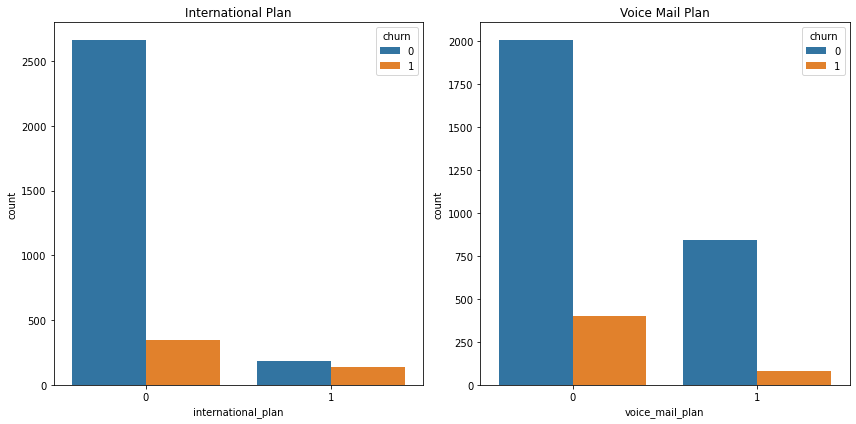

In [13]:
print(df['international_plan'].value_counts(normalize=True))
print()
print(df['voice_mail_plan'].value_counts(normalize=True))


#Performing label encoding
#No becomes 0 and yes becomes 1.
df['international_plan'] = encoder.fit_transform(df['international_plan'])
df['voice_mail_plan'] = encoder.fit_transform(df['voice_mail_plan'])

#Histograms
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first count plot
sns.countplot(x='international_plan', hue='churn', data=df, ax=axes[0])
axes[0].set_title('International Plan')

# Plot the second count plot
sns.countplot(x='voice_mail_plan', hue='churn', data=df, ax=axes[1])
axes[1].set_title('Voice Mail Plan')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

### Numeric Columns
Findings from the ditributions:
- `account_length`: There is a member who has been with the company around twice as long as the 75th percentile of customers.
- `area_code`: This is really a categorical variable. We can label encode this.
- `number_vmail_messages`: 50% of the dataset has zero voice mail messages, which might make sense since 72% of the customers do not have voice mail plans.




In [14]:
df.describe()

account_length    area_code  international_plan  voice_mail_plan  \
count     3333.000000  3333.000000         3333.000000      3333.000000   
mean       101.064806   437.182418            0.096910         0.276628   
std         39.822106    42.371290            0.295879         0.447398   
min          1.000000   408.000000            0.000000         0.000000   
25%         74.000000   408.000000            0.000000         0.000000   
50%        101.000000   415.000000            0.000000         0.000000   
75%        127.000000   510.000000            0.000000         1.000000   
max        243.000000   510.000000            1.000000         1.000000   

       number_vmail_messages  total_day_minutes  total_day_calls  \
count            3333.000000        3333.000000      3333.000000   
mean                8.099010         179.775098       100.435644   
std                13.688365          54.467389        20.069084   
min                 0.000000           0.000000         0.000000   
25%                 0.000000         143.700000        87.000000   
50%                 0.000000         179.400000       101.000000   
75%                20.000000         216.400000       114.000000   
max                51.000000         350.800000       165.000000   

       total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
count       3333.000000        3333.000000      3333.000000       3333.000000   
mean          30.562307         200.980348       100.114311         17.083540   
std            9.259435          50.713844        19.922625          4.310668   
min            0.000000           0.000000         0.000000          0.000000   
25%           24.430000         166.600000        87.000000         14.160000   
50%           30.500000         201.400000       100.000000         17.120000   
75%           36.790000         235.300000       114.000000         20.000000   
max           59.640000         363.700000       170.000000         30.910000   

       total_night_minutes  total_night_calls  total_night_charge  \
count          3333.000000        3333.000000         3333.000000   
mean            200.872037         100.107711            9.039325   
std              50.573847          19.568609            2.275873   
min              23.200000          33.000000            1.040000   
25%             167.000000          87.000000            7.520000   
50%             201.200000         100.000000            9.050000   
75%             235.300000         113.000000           10.590000   
max             395.000000         175.000000           17.770000   

       total_intl_minutes  total_intl_calls  total_intl_charge  \
count         3333.000000       3333.000000        3333.000000   
mean            10.237294          4.479448           2.764581   
std              2.791840          2.461214           0.753773   
min              0.000000          0.000000           0.000000   
25%              8.500000          3.000000           2.300000   
50%             10.300000          4.000000           2.780000   
75%             12.100000          6.000000           3.270000   
max             20.000000         20.000000           5.400000   

       customer_service_calls        churn  
count             3333.000000  3333.000000  
mean                 1.562856     0.144914  
std                  1.315491     0.352067  
min                  0.000000     0.000000  
25%                  1.000000     0.000000  
50%                  1.000000     0.000000  
75%                  2.000000     0.000000  
max                  9.000000     1.000000

415    1655
510     840
408     838
Name: area_code, dtype: int64


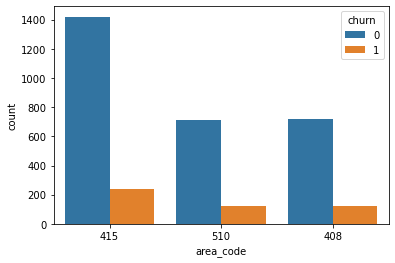

In [15]:
print(df['area_code'].value_counts())

#We should not use label encoding here. This would introduce unintendented ordinalitiy.
#Instead we should perform Onehot encoding, after the train test split.
#Ask how we can make sure our train model includes all possible area codes. (This will be the same for state) 

# # Here we are label encoding. 0 = 408, 1 = 415, 2 = 840
# df['area_code'] = encoder.fit_transform(df['area_code'])
# df['area_code'].value_counts()
sns.countplot(x='area_code', hue='churn', data=df, order=df['area_code'].value_counts().index);


### Correlation Analysis

Looking at the heatmap below, its clear that charge and minutes are perfectly correlated, which makes sense if the company is charging per minute. If we need to, we can confidently drop the 'charge' column from each category; day, eve, night, and intl. We can keep the 'minutes' category as it is unclear what currency metric 'charge' is referring to.

We can also see that minutes and churn are slightly correlated but not significantly enough to provide any meaningful inforamation.

Lastly, as discussed above, there is a near perfect correlation between `number_vmail_messages` and `voice_mail_plan`. This makes sense and these two columns much like 'charge' and 'minutes' are telling us the same thing. We should drop `number_vmail_messages` as this variable is least correlated to churn.

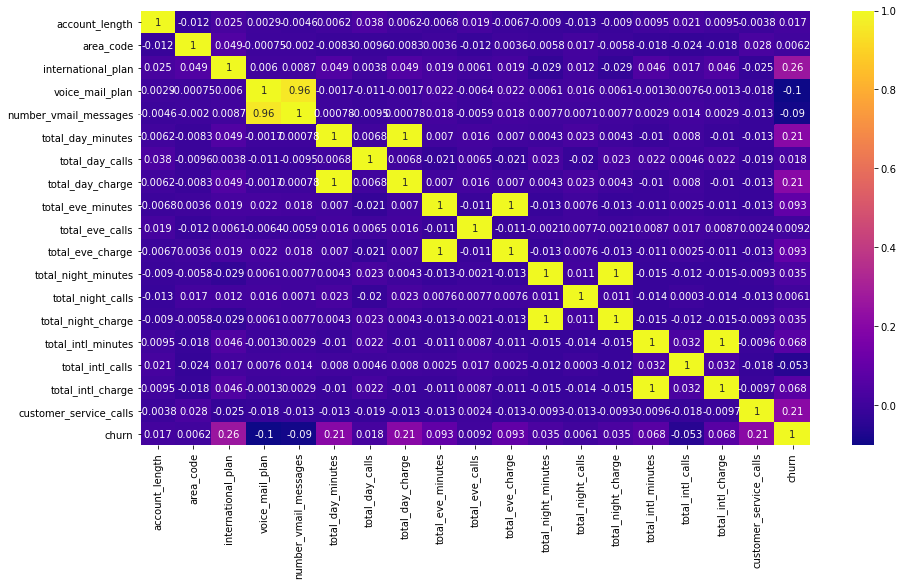

In [16]:
# Correlation analysis

fig, ax = plt.subplots(figsize=(15,8))

sns.heatmap(df.select_dtypes('number').corr(),annot=True,cmap='plasma');

### Variance Inflation Factor Analysis

In [17]:
#This will eventually get deleted and we will move the next line of code up before the VIF analysis.
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df.drop(['churn','state'], axis = 1)
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.sort_values('VIF Factor', ascending=False)

VIF Factor                features
7   1.246305e+08        total_day_charge
5   1.246260e+08       total_day_minutes
10  3.742509e+07        total_eve_charge
8   3.742375e+07       total_eve_minutes
11  1.072035e+07     total_night_minutes
13  1.072000e+07      total_night_charge
16  9.987231e+05       total_intl_charge
14  9.983549e+05      total_intl_minutes
1   6.108796e+01               area_code
12  2.462797e+01       total_night_calls
9   2.375475e+01         total_eve_calls
6   2.362073e+01         total_day_calls
3   1.645721e+01         voice_mail_plan
4   1.607147e+01   number_vmail_messages
0   7.301164e+00          account_length
15  4.275759e+00        total_intl_calls
17  2.405351e+00  customer_service_calls
2   1.117372e+00      international_plan

In [18]:
#Dropping charge columns
df.drop(labels=['number_vmail_messages', 'total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge'],
       axis=1,
       inplace=True)
df.head()

state  account_length  area_code  international_plan  voice_mail_plan  \
0    KS             128        415                   0                1   
1    OH             107        415                   0                1   
2    NJ             137        415                   0                0   
3    OH              84        408                   1                0   
4    OK              75        415                   1                0   

   total_day_minutes  total_day_calls  total_eve_minutes  total_eve_calls  \
0              265.1              110              197.4               99   
1              161.6              123              195.5              103   
2              243.4              114              121.2              110   
3              299.4               71               61.9               88   
4              166.7              113              148.3              122   

   total_night_minutes  total_night_calls  total_intl_minutes  \
0                244.7                 91                10.0   
1                254.4                103                13.7   
2                162.6                104                12.2   
3                196.9                 89                 6.6   
4                186.9                121                10.1   

   total_intl_calls  customer_service_calls  churn  
0                 3                       1      0  
1                 3                       1      0  
2                 5                       0      0  
3                 7                       2      0  
4                 3                       3      0

In [19]:
X = df.drop(['churn','state'], axis = 1)
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.sort_values('VIF Factor', ascending=False)

VIF Factor                features
1    60.999597               area_code
9    24.606723       total_night_calls
7    23.725329         total_eve_calls
5    23.587873         total_day_calls
8    15.754767     total_night_minutes
6    15.605072       total_eve_minutes
10   13.661440      total_intl_minutes
4    11.468406       total_day_minutes
0     7.293429          account_length
11    4.269564        total_intl_calls
12    2.404174  customer_service_calls
3     1.382626         voice_mail_plan
2     1.116432      international_plan

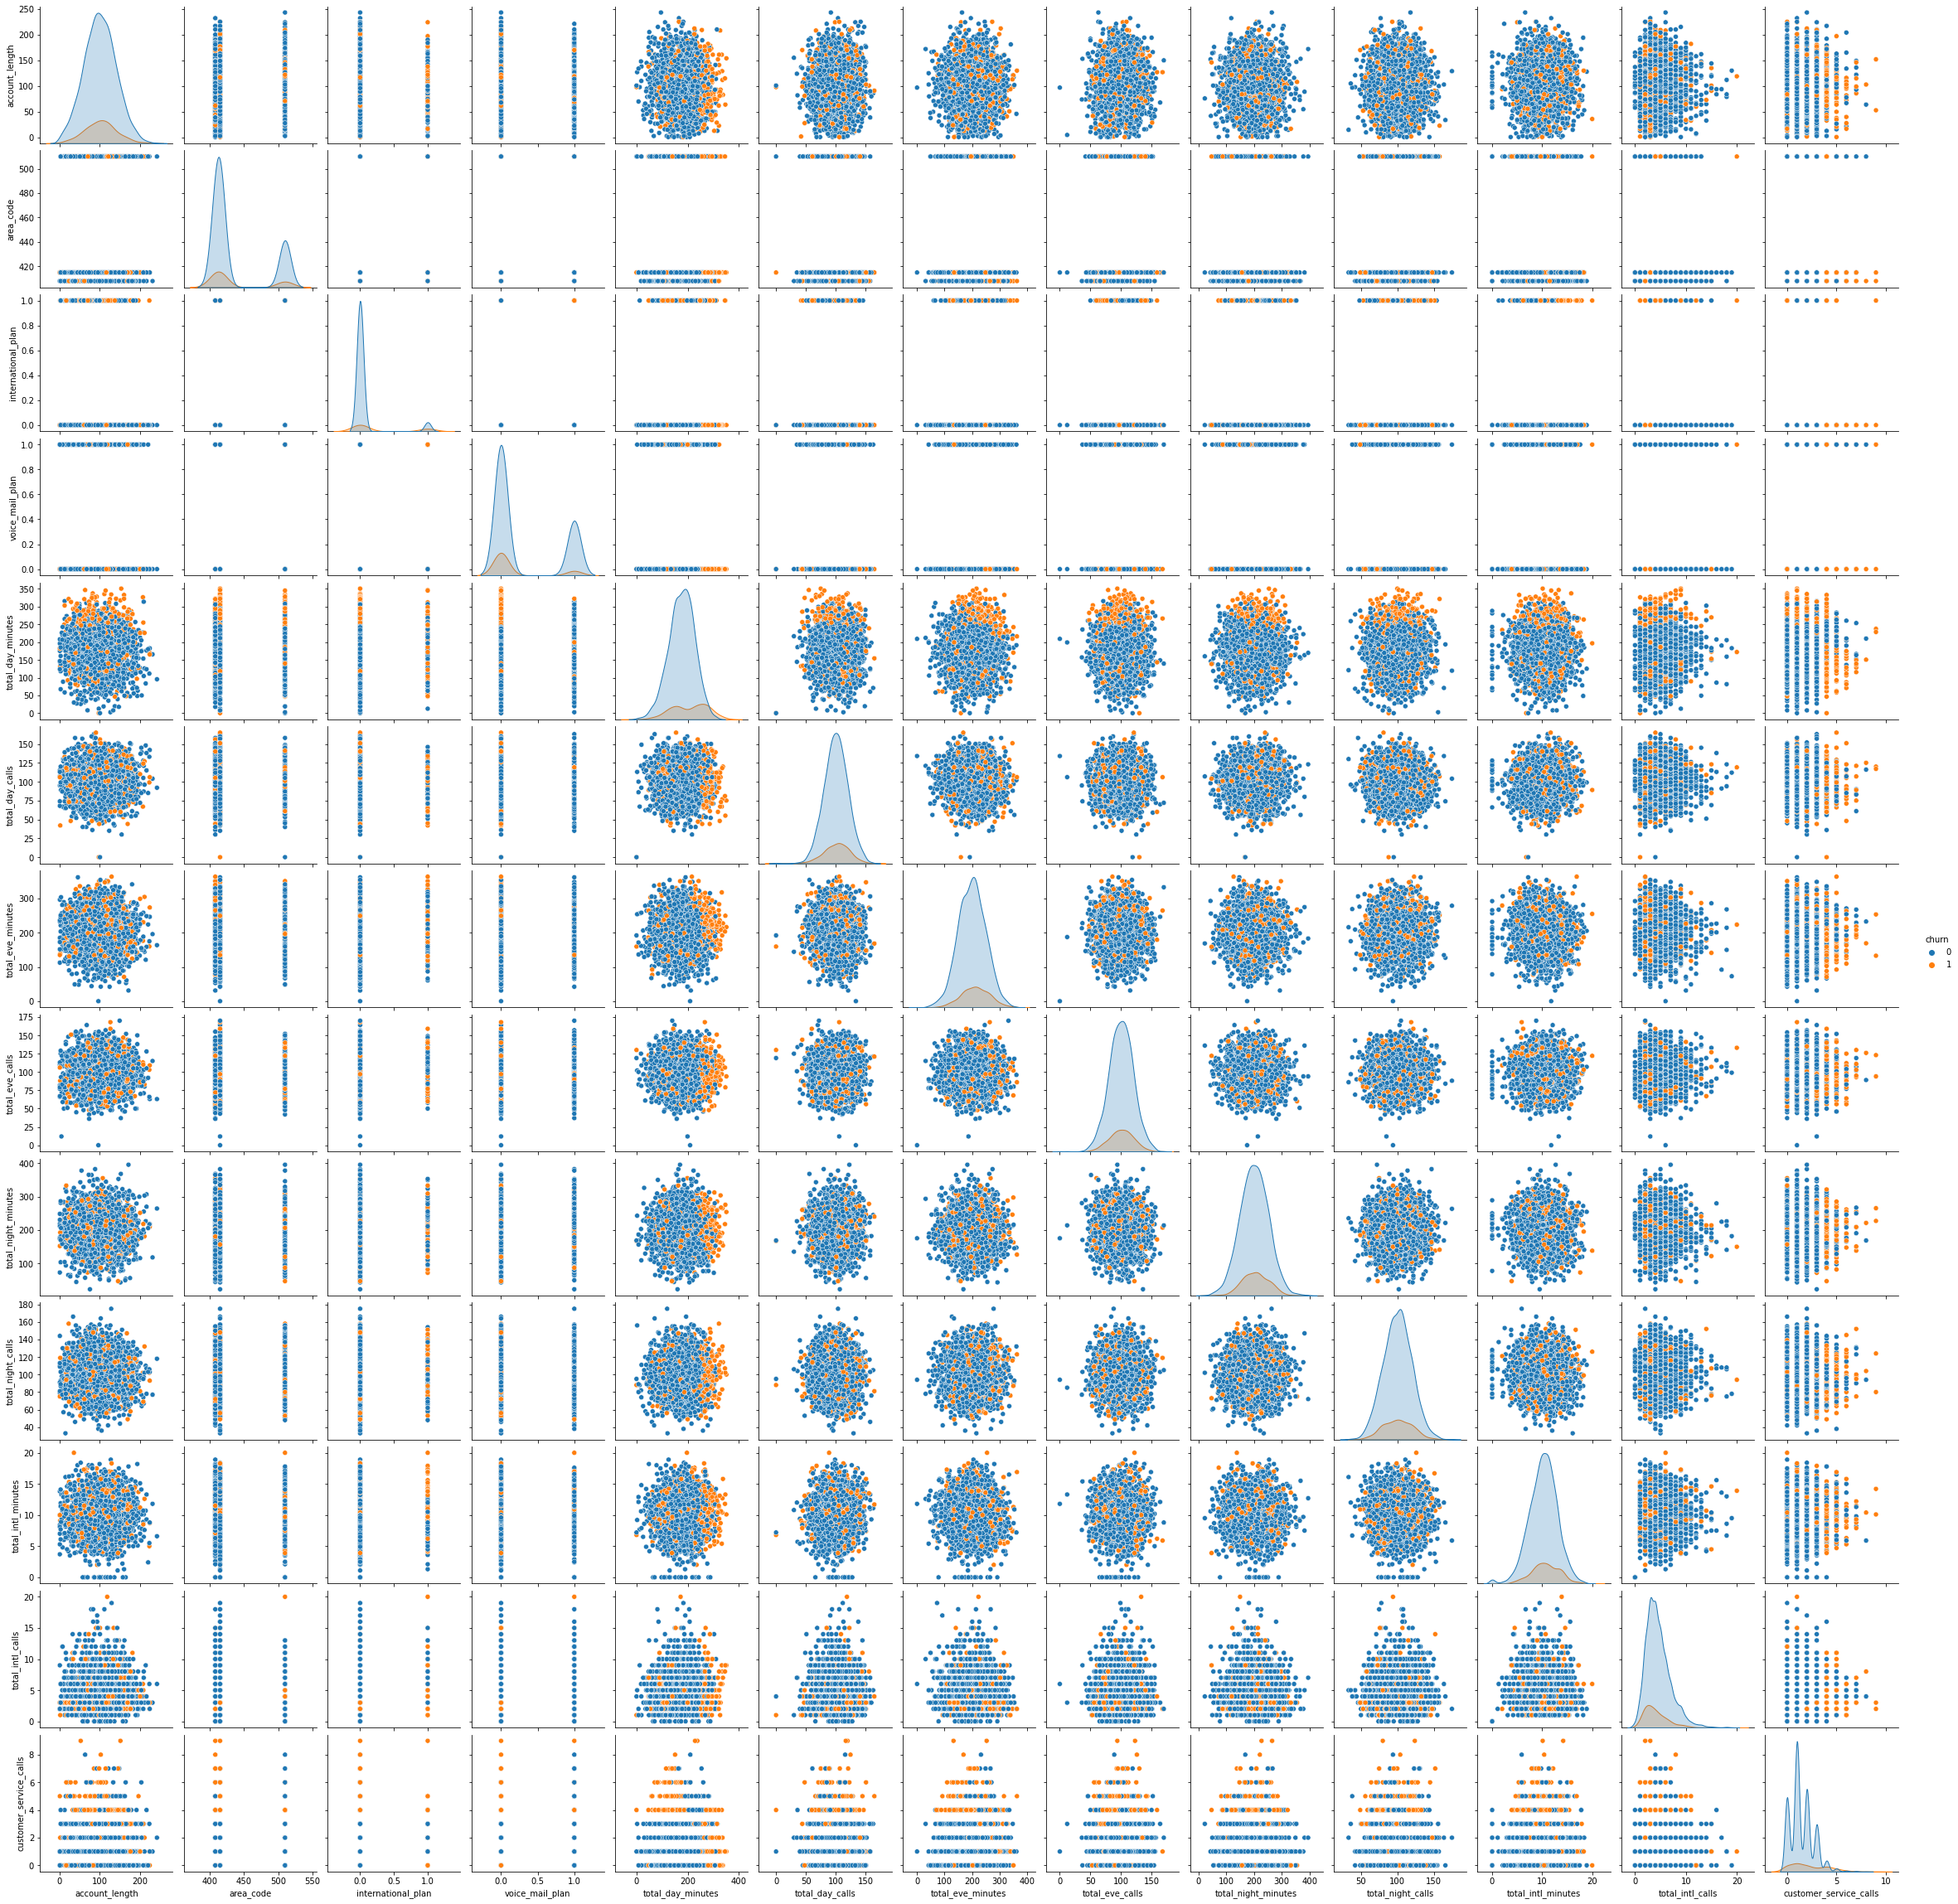

In [20]:
sns.pairplot(df.select_dtypes('number'), hue = 'churn');

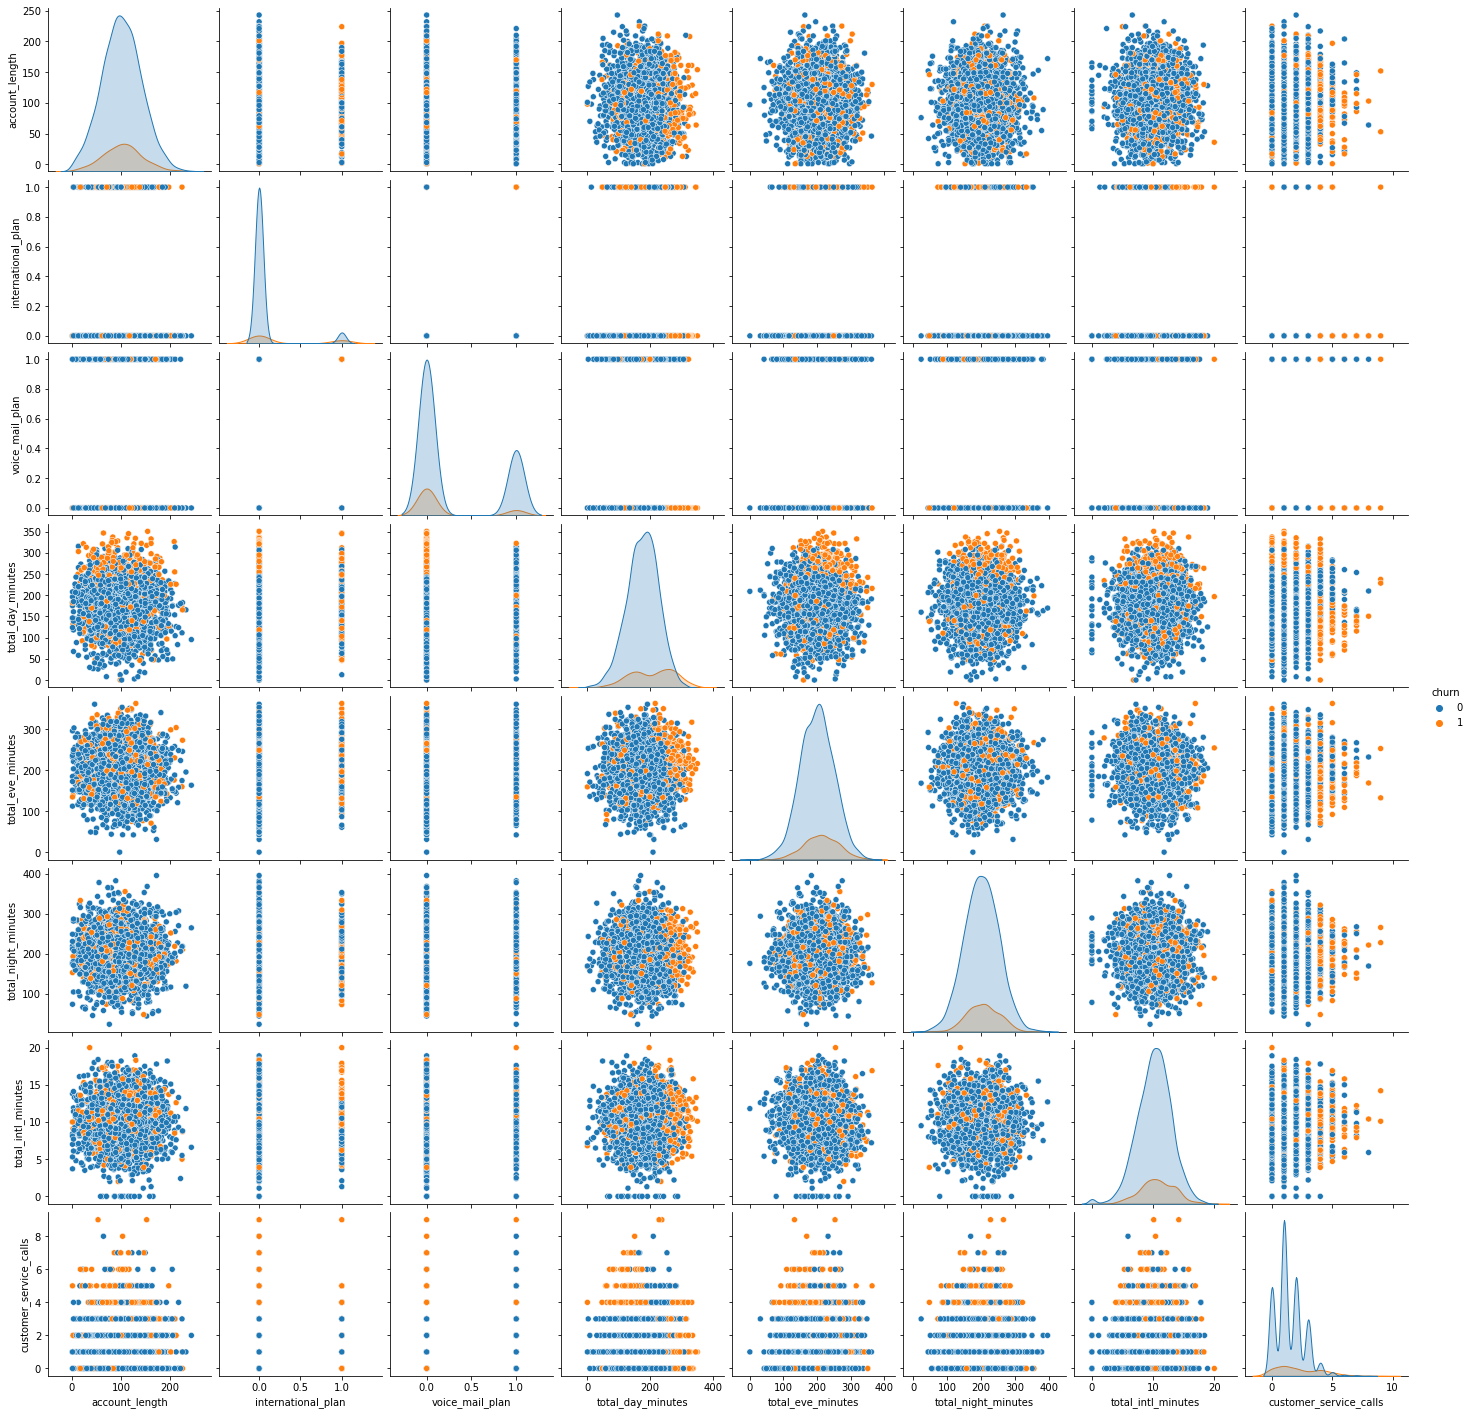

In [21]:
pp_features = df[['account_length', 'international_plan', 'voice_mail_plan', 
                  'total_day_minutes', 'total_eve_minutes', 'total_night_minutes',
                 'total_intl_minutes', 'customer_service_calls', 'churn']]

sns.pairplot(pp_features, hue = 'churn');

## 4. Data Preperation

In [22]:
# Define X and y, and split train/test data
df_copy = df.copy()

X = df_copy.drop(columns=['churn'],axis=1)
y = df_copy['churn']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=7,stratify=y)

In [23]:
def init_processing(X):
    '''
    Initial processing, takes in train and test data.
    '''
    # transfrom y/n columns to 1/0
    #X['international_plan'] = X['international_plan'].map({'yes':1,'no':0})
    #X['voice_mail_plan'] = X['voice_mail_plan'].map({'yes':1,'no':0})
    # make 'state' uppercase to eliminate inconsitencies 
    X['state'] = X['state'].str.upper()
    # turn `phone_number` into int
    #X['phone_number'] = X['phone_number'].str.replace('-','').astype(int)
    return X

X_train = init_processing(X_train)
X_train

state  account_length  area_code  international_plan  voice_mail_plan  \
2965    WI             103        415                   0                0   
692     NE              82        408                   0                0   
64      NC              38        408                   0                0   
1005    ND              12        510                   1                0   
2892    DE             103        415                   0                1   
...    ...             ...        ...                 ...              ...   
2511    OH             169        408                   0                0   
2038    TX             136        408                   0                0   
3300    SC             111        415                   0                1   
3313    ID             127        408                   0                0   
3294    MO             116        408                   0                0   

      total_day_minutes  total_day_calls  total_eve_minutes  total_eve_calls  \
2965              180.2              134               97.7               85   
692               185.8               36              276.5              134   
64                131.2               98              162.9               97   
1005              216.7              117              116.5              126   
2892              138.8               80              142.0              108   
...                 ...              ...                ...              ...   
2511              147.2              115              161.9              123   
2038              269.8              106              228.8              101   
3300              127.1               94              228.3              116   
3313              102.8              128              143.7               95   
3294               51.1              106              208.6              137   

      total_night_minutes  total_night_calls  total_intl_minutes  \
2965                181.7                134                 8.4   
692                 192.1                104                 5.7   
64                  159.0                106                 8.2   
1005                220.0                110                 9.8   
2892                183.8                 77                11.8   
...                   ...                ...                 ...   
2511                142.1                103                 7.2   
2038                257.5                106                10.1   
3300                166.7                108                 7.1   
3313                191.4                 97                10.0   
3294                198.0                 92                12.3   

      total_intl_calls  customer_service_calls  
2965                 3                       1  
692                  7                       4  
64                   6                       2  
1005                 4                       2  
2892                 7                       1  
...                ...                     ...  
2511                 6                       3  
2038                 8                       1  
3300                 3                       1  
3313                 5                       1  
3294                 3                       1  

[2499 rows x 14 columns]

In [24]:
# Tranform 'state' column with OneHotEncoder

ohe = OneHotEncoder(drop="first", sparse=False, handle_unknown='ignore')
ohe_df = pd.DataFrame(ohe.fit_transform(X_train[['state']]),columns=ohe.get_feature_names_out(['state']),index=X_train.index)
X_train.drop(columns=['state'],axis=1,inplace=True)
X_train = pd.concat([X_train,ohe_df],axis=1)
X_train

account_length  area_code  international_plan  voice_mail_plan  \
2965             103        415                   0                0   
692               82        408                   0                0   
64                38        408                   0                0   
1005              12        510                   1                0   
2892             103        415                   0                1   
...              ...        ...                 ...              ...   
2511             169        408                   0                0   
2038             136        408                   0                0   
3300             111        415                   0                1   
3313             127        408                   0                0   
3294             116        408                   0                0   

      total_day_minutes  total_day_calls  total_eve_minutes  total_eve_calls  \
2965              180.2              134               97.7               85   
692               185.8               36              276.5              134   
64                131.2               98              162.9               97   
1005              216.7              117              116.5              126   
2892              138.8               80              142.0              108   
...                 ...              ...                ...              ...   
2511              147.2              115              161.9              123   
2038              269.8              106              228.8              101   
3300              127.1               94              228.3              116   
3313              102.8              128              143.7               95   
3294               51.1              106              208.6              137   

      total_night_minutes  total_night_calls  ...  state_SD  state_TN  \
2965                181.7                134  ...       0.0       0.0   
692                 192.1                104  ...       0.0       0.0   
64                  159.0                106  ...       0.0       0.0   
1005                220.0                110  ...       0.0       0.0   
2892                183.8                 77  ...       0.0       0.0   
...                   ...                ...  ...       ...       ...   
2511                142.1                103  ...       0.0       0.0   
2038                257.5                106  ...       0.0       0.0   
3300                166.7                108  ...       0.0       0.0   
3313                191.4                 97  ...       0.0       0.0   
3294                198.0                 92  ...       0.0       0.0   

      state_TX  state_UT  state_VA  state_VT  state_WA  state_WI  state_WV  \
2965       0.0       0.0       0.0       0.0       0.0       1.0       0.0   
692        0.0       0.0       0.0       0.0       0.0       0.0       0.0   
64         0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1005       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
2892       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
...        ...       ...       ...       ...       ...       ...       ...   
2511       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
2038       1.0       0.0       0.0       0.0       0.0       0.0       0.0   
3300       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
3313       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
3294       0.0       0.0       0.0       0.0       0.0       0.0       0.0   

      state_WY  
2965       0.0  
692        0.0  
64         0.0  
1005       0.0  
2892       0.0  
...        ...  
2511       0.0  
2038       0.0  
3300       0.0  
3313       0.0  
3294       0.0  

[2499 rows x 63 columns]

In [25]:
# Tranform 'area_code' column with OneHotEncoder

ohe = OneHotEncoder(drop="first", sparse=False, handle_unknown='ignore')
ohe_df = pd.DataFrame(ohe.fit_transform(X_train[['area_code']]),columns=ohe.get_feature_names_out(['area_code']),index=X_train.index)
X_train.drop(columns=['area_code'],axis=1,inplace=True)
X_train = pd.concat([X_train,ohe_df],axis=1)
X_train

account_length  international_plan  voice_mail_plan  total_day_minutes  \
2965             103                   0                0              180.2   
692               82                   0                0              185.8   
64                38                   0                0              131.2   
1005              12                   1                0              216.7   
2892             103                   0                1              138.8   
...              ...                 ...              ...                ...   
2511             169                   0                0              147.2   
2038             136                   0                0              269.8   
3300             111                   0                1              127.1   
3313             127                   0                0              102.8   
3294             116                   0                0               51.1   

      total_day_calls  total_eve_minutes  total_eve_calls  \
2965              134               97.7               85   
692                36              276.5              134   
64                 98              162.9               97   
1005              117              116.5              126   
2892               80              142.0              108   
...               ...                ...              ...   
2511              115              161.9              123   
2038              106              228.8              101   
3300               94              228.3              116   
3313              128              143.7               95   
3294              106              208.6              137   

      total_night_minutes  total_night_calls  total_intl_minutes  ...  \
2965                181.7                134                 8.4  ...   
692                 192.1                104                 5.7  ...   
64                  159.0                106                 8.2  ...   
1005                220.0                110                 9.8  ...   
2892                183.8                 77                11.8  ...   
...                   ...                ...                 ...  ...   
2511                142.1                103                 7.2  ...   
2038                257.5                106                10.1  ...   
3300                166.7                108                 7.1  ...   
3313                191.4                 97                10.0  ...   
3294                198.0                 92                12.3  ...   

      state_TX  state_UT  state_VA  state_VT  state_WA  state_WI  state_WV  \
2965       0.0       0.0       0.0       0.0       0.0       1.0       0.0   
692        0.0       0.0       0.0       0.0       0.0       0.0       0.0   
64         0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1005       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
2892       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
...        ...       ...       ...       ...       ...       ...       ...   
2511       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
2038       1.0       0.0       0.0       0.0       0.0       0.0       0.0   
3300       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
3313       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
3294       0.0       0.0       0.0       0.0       0.0       0.0       0.0   

      state_WY  area_code_415  area_code_510  
2965       0.0            1.0            0.0  
692        0.0            0.0            0.0  
64         0.0            0.0            0.0  
1005       0.0            0.0            1.0  
2892       0.0            1.0            0.0  
...        ...            ...            ...  
2511       0.0            0.0            0.0  
2038       0.0            0.0            0.0  
3300       0.0            1.0            0.0  
3313       0.0            0.

In [26]:
base = DummyClassifier(strategy = 'stratified',random_state=42)
base.fit(X_train,y_train)

DummyClassifier(random_state=42, strategy='stratified')

In [27]:
logreg_model = LogisticRegression(random_state=42,solver='liblinear')
logreg_model.fit(X_train,y_train)

LogisticRegression(random_state=42, solver='liblinear')

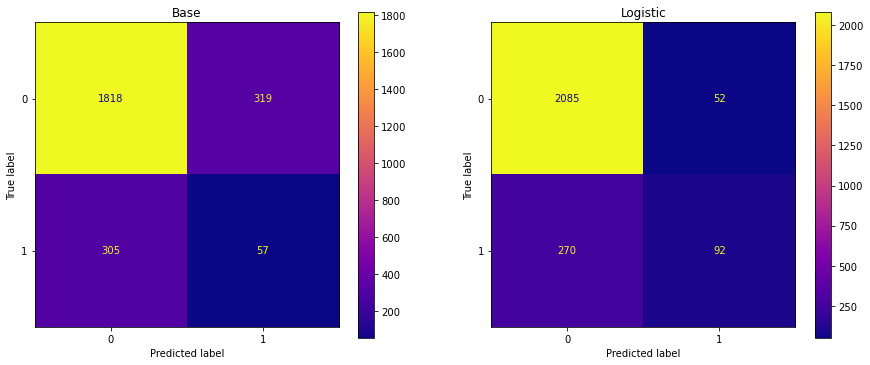

In [28]:
fig, ax = plt.subplots(ncols=2,figsize=(15,6))

ax[0].set_title('Base')
ax[1].set_title('Logistic')

ConfusionMatrixDisplay.from_estimator(base,X_train,y_train,ax=ax[0],cmap='plasma')
ConfusionMatrixDisplay.from_estimator(logreg_model,X_train,y_train,ax=ax[1],cmap='plasma');

In [29]:
logreg_model_l1 = LogisticRegression(random_state=42,solver='liblinear',penalty='l1')
logreg_model_l1.fit(X_train,y_train)

LogisticRegression(penalty='l1', random_state=42, solver='liblinear')

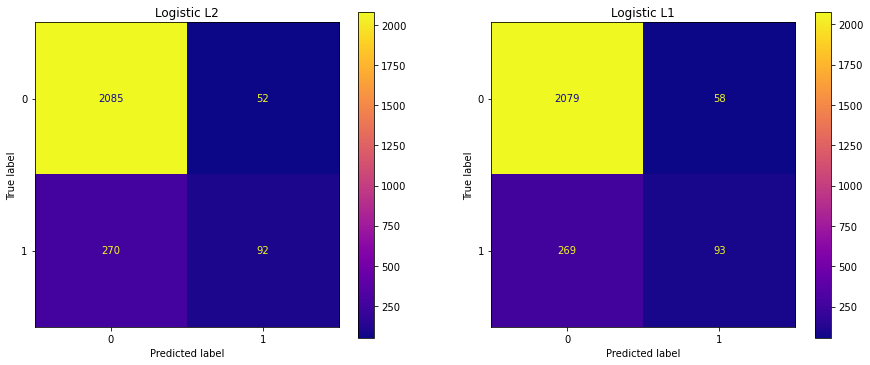

In [30]:
fig, ax = plt.subplots(ncols=2,figsize=(15,6))

ax[0].set_title('Logistic L2')
ax[1].set_title('Logistic L1')

ConfusionMatrixDisplay.from_estimator(logreg_model,X_train,y_train,ax=ax[0],cmap='plasma')
ConfusionMatrixDisplay.from_estimator(logreg_model_l1,X_train,y_train,ax=ax[1],cmap='plasma');

In [31]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [32]:
def scale(X, scaler):
    '''
    Takes DataFrame and fitted scaler as input.
    '''
    X_scaled = scaler.transform(X)
    X_scaled = pd.DataFrame(X_scaled,columns=X.columns,index=X.index)
    return X_scaled

In [33]:
X_train_scaled = scale(X_train,scaler)
X_train_scaled.head()

account_length  international_plan  voice_mail_plan  total_day_minutes  \
2965        0.047680           -0.321421        -0.620689           0.003946   
692        -0.479760           -0.321421        -0.620689           0.107169   
64         -1.584873           -0.321421        -0.620689          -0.899251   
1005       -2.237894            3.111187        -0.620689           0.676736   
2892        0.047680           -0.321421         1.611112          -0.759163   

      total_day_calls  total_eve_minutes  total_eve_calls  \
2965         1.682382          -2.026492        -0.752785   
692         -3.252032           1.507305         1.721096   
64          -0.130260          -0.737882        -0.146937   
1005         0.826412          -1.654930         1.317197   
2892        -1.036581          -1.150949         0.408425   

      total_night_minutes  total_night_calls  total_intl_minutes  ...  \
2965            -0.374243           1.733515           -0.665172  ...   
692             -0.167396           0.205022           -1.646632  ...   
64              -0.825725           0.306922           -0.737873  ...   
1005             0.387509           0.510721           -0.156267  ...   
2892            -0.332476          -1.170621            0.570740  ...   

      state_TX  state_UT  state_VA  state_VT  state_WA  state_WI  state_WV  \
2965 -0.144338 -0.147201 -0.152779 -0.148613 -0.139942  6.375735 -0.180678   
692  -0.144338 -0.147201 -0.152779 -0.148613 -0.139942 -0.156845 -0.180678   
64   -0.144338 -0.147201 -0.152779 -0.148613 -0.139942 -0.156845 -0.180678   
1005 -0.144338 -0.147201 -0.152779 -0.148613 -0.139942 -0.156845 -0.180678   
2892 -0.144338 -0.147201 -0.152779 -0.148613 -0.139942 -0.156845 -0.180678   

      state_WY  area_code_415  area_code_510  
2965 -0.154145       0.998001       -0.57504  
692  -0.154145      -1.002003       -0.57504  
64   -0.154145      -1.002003       -0.57504  
1005 -0.154145      -1.002003        1.73901  
2892 -0.154145       0.998001       -0.57504  

[5 rows x 64 columns]

In [35]:
logreg_scaled = LogisticRegression(random_state=42)
logreg_scaled.fit(X_train_scaled,y_train)

LogisticRegression(random_state=42)

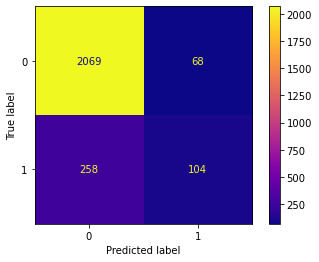

In [36]:
ConfusionMatrixDisplay.from_estimator(logreg_scaled,X_train_scaled,y_train,cmap='plasma');